In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_water = pd.read_csv('base.csv')
conservative = pd.read_csv('under.csv')
overflow = pd.read_csv('over.csv')

df1 = base_water['renewableQuantity']
df2 = conservative['renewableQuantity']
df3 = overflow['renewableQuantity']

new_df = pd.DataFrame()
new_df['base'] = df1.values
new_df['conservative'] = df2.values
new_df['overflow'] = df3.values
new_df.columns = ['Reusable water between 30% and 35% (base model)', 'Reusable water between 10% and 20%', 'Reusable water between 40% and 50%']
new_df.to_csv('water.csv')

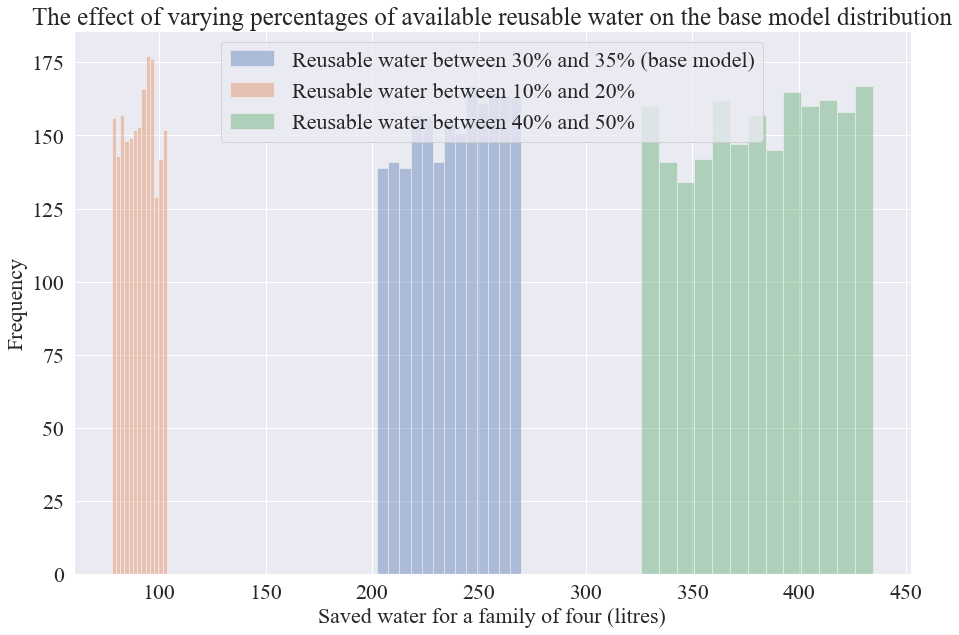

In [4]:
rc = {
    "font.size":35,
    "axes.titlesize":25,
    "axes.labelsize":22,
    "figure.figsize": (15,10),
    'font.family':'serif', 
    'font.serif':'Times New Roman'
}
sns.set(rc=rc, font_scale=2)

ax = sns.distplot(base_water['renewableQuantity'].values[0:2000], label='Reusable water between 30% and 35% (base model)', kde = False)
sns.distplot(conservative['renewableQuantity'].values[0:2000], label='Reusable water between 10% and 20%', kde = False)
sns.distplot(overflow['renewableQuantity'].values[0:2000], label='Reusable water between 40% and 50%', kde = False)

ax.set(xlabel='Saved water for a family of four (litres)', ylabel='Frequency', title='The effect of varying percentages of available reusable water on the base model distribution')
plt.legend()
plt.savefig("hist.png")

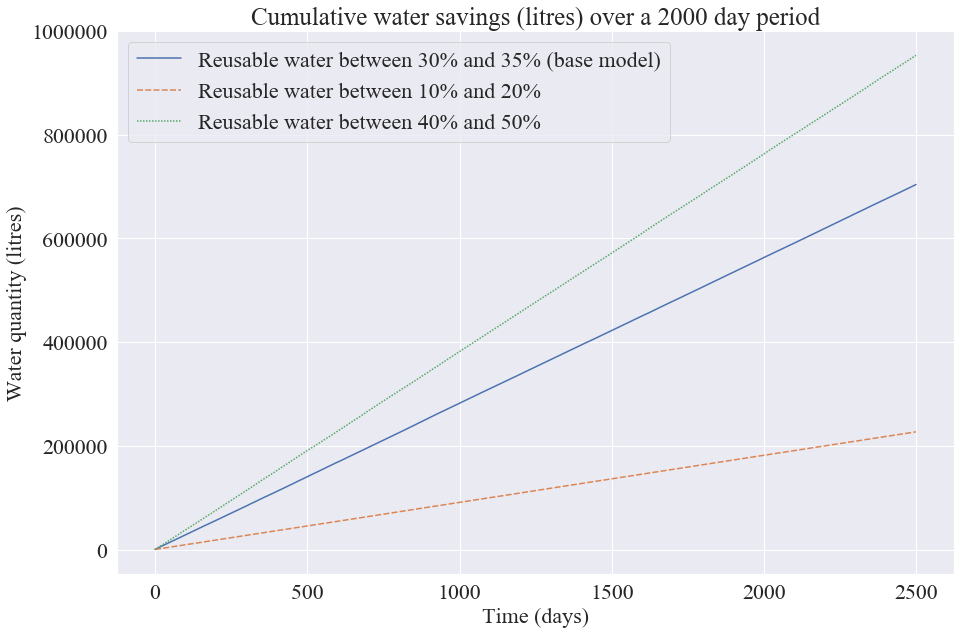

In [154]:
ax = sns.lineplot(data=new_df[0:2500].cumsum())
ax.set(xlabel='Time (days)', ylabel='Water quantity (litres)', title='Cumulative water savings (litres) over a 2000 day period')
plt.savefig('cumsum_2000.png')

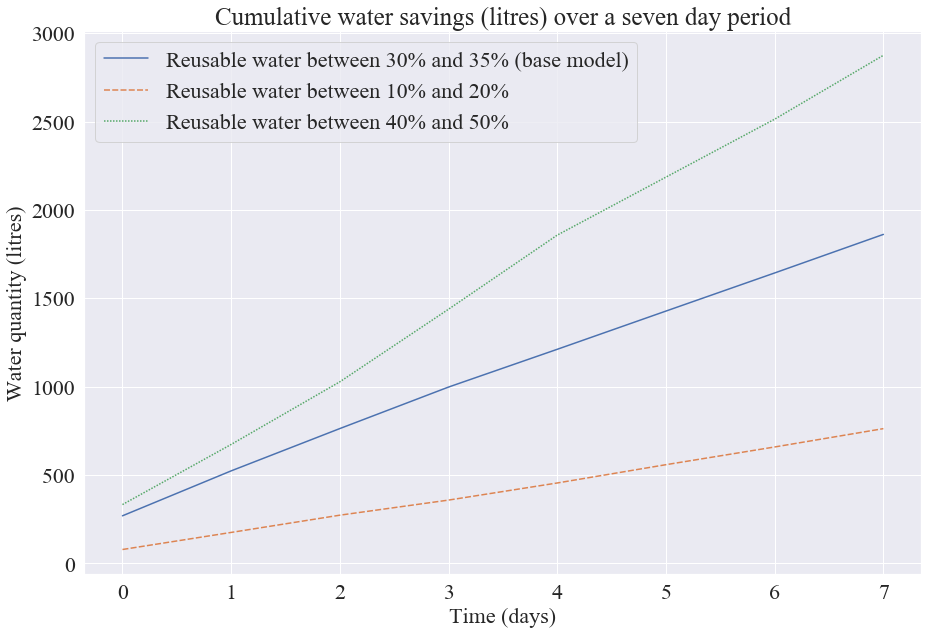

In [158]:
new_df = new_df.loc[0:7]
ax = sns.lineplot(data=new_df.cumsum())
ax.set(xlabel='Time (days)', ylabel='Water quantity (litres)', title='Cumulative water savings (litres) over a seven day period')
plt.savefig('cumsum_7.png')

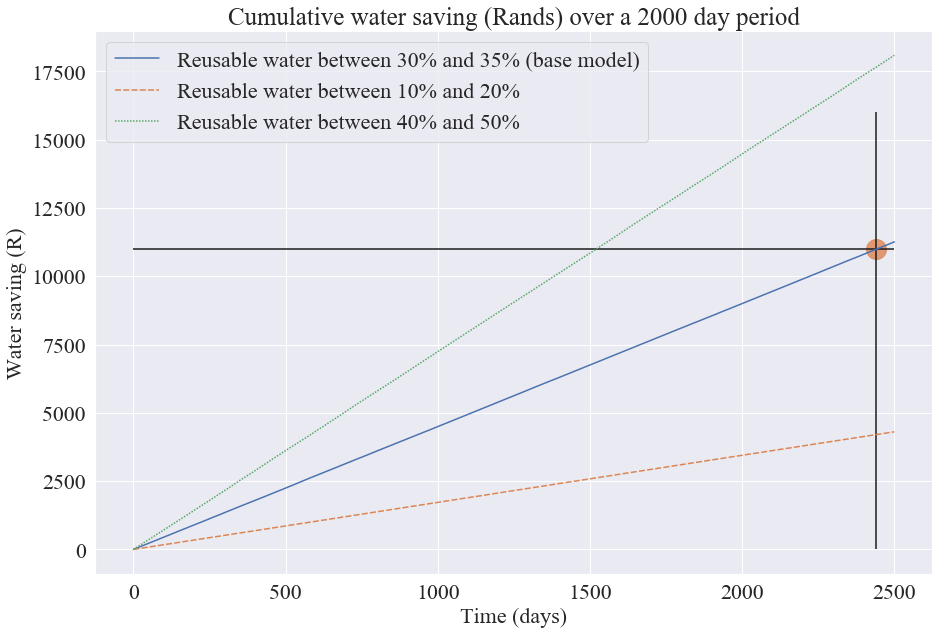

In [7]:
# plot price - R18.97 per kilolitre
new_df = new_df.loc[0:2500]
ax = sns.lineplot(data=new_df.cumsum()*(18.97/1000))
ax.set(xlabel='Time (days)', ylabel='Water saving (R)', title='Cumulative water saving (Rands) over a 2000 day period')
ax.hlines(11000, 0, 2500)
ax.vlines(2440, 16000, 0)
sns.regplot(x=np.array([2440]), y=np.array([11000]), scatter=True, fit_reg=False, marker='o',
            scatter_kws={"s": 400})
plt.savefig('cumsum_2000_rand.png')